In [1]:
# load metafiles to have a clear overview of where each final genome came from
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import matplotlib.patches as patches
import time
from collections import Counter
import sklearn.cluster as cluster
import time
import hdbscan
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import re
from os import listdir
from os.path import isfile, join

import HTSeq
from Bio import SeqIO

font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2) 
sns.set(font_scale = 2)

In [23]:
captest1 = pd.read_table('CapTests/Test lysis - Sheet3.tsv')

In [31]:
captest1.groupby('Collection').mean()
captest1[~captest1['Well_number'].str.contains('H2')]

,Well_number,Cell_number,Collection,comments,verdict,CONCENTRATION,DATE,day_number
0,A1,1,PBMC,"cell in buffer only, no sds",NaN,0.2887,21-01-18,Day 1
1,B1,2,PBMC,"2 cells went in intact, with SDS",NaN,0.2059,21-01-18,NaN
2,C1,3,empty control,NaN,NaN,0.1603,21-01-18,NaN
3,D1,4,PBMC,lysed in front of cap,NaN,0.2310,21-01-18,NaN
4,E1,5,empty control,SDS,NaN,0.1663,21-01-18,NaN
5,A2,6,"pancreas, no travel",NaN,CELL,3.9896,25-01-18,Day 2?
6,B2,7,"pancreas, no travel",NaN,CELL,1.7582,25-01-18,NaN
7,C2,8,empty control,NaN,DEGRADED SOMETHING,0.5362,25-01-18,NaN
8,D2,9,"pancreas, no travel",change pippette,CELL,2.5437,25-01-18,NaN
9,E2,10,"pancreas, no travel",NaN,CELL,1.4771,25-01-18,NaN


/usr/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


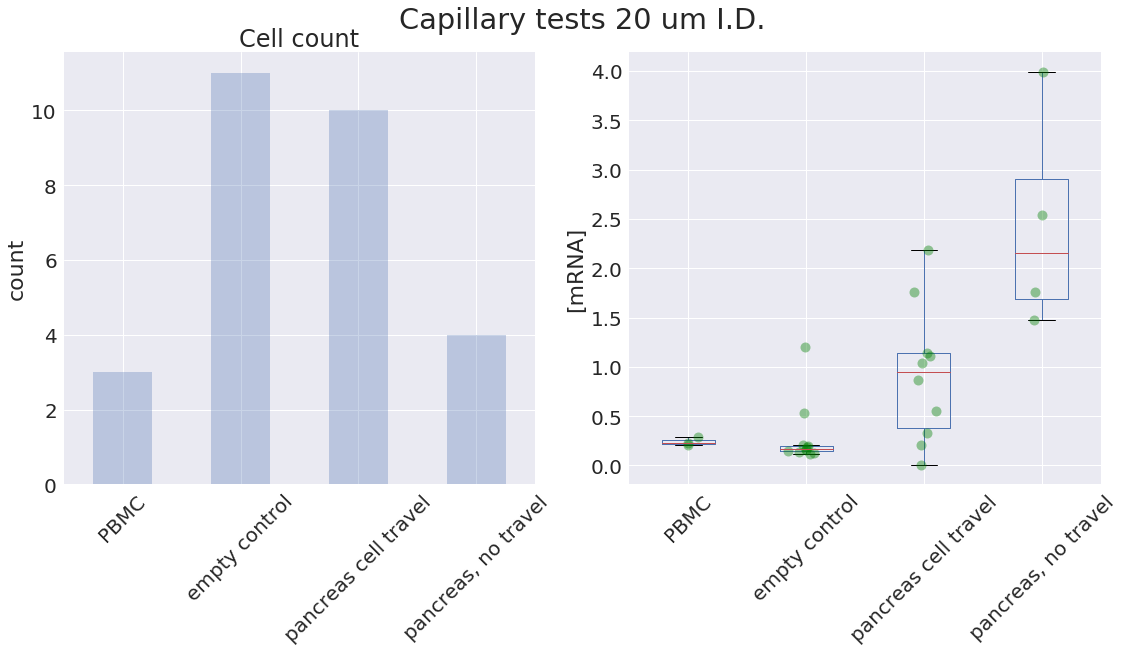

In [84]:
from matplotlib.artist import setp
realdata = captest1[~captest1['Well_number'].str.contains('H2')]


f = plt.figure()
f.set_figwidth(18)
f.set_figheight(8)
gs = gridspec.GridSpec(1, 2)
ax1 = f.add_subplot(gs[0,1])
captest1[~captest1['Well_number'].str.contains('H2')].boxplot('CONCENTRATION',by='Collection',ax=ax1)
plt.xticks(rotation=45)
k=1
for i in ['PBMC', 'empty control', 'pancreas cell travel','pancreas, no travel']:
    y = realdata[realdata['Collection']==i]['CONCENTRATION']
    # Add some random "jitter" to the x-axis
    
    x = np.random.normal(k, 0.04, size=len(y))
    k+=1
    plt.plot(x, y, 'g.',markersize=20, alpha=0.4)



plt.xlabel('');plt.ylabel('[mRNA]')
plt.title('')

ax2 = f.add_subplot(gs[0,0])
captest1[~captest1['Well_number'].str.contains('H2')].groupby('Collection').count()['Well_number'].plot.bar(alpha=0.3)
plt.xlabel('');plt.ylabel('count')
plt.xticks(rotation=45)
plt.title('Cell count')
plt.suptitle('Capillary tests 20 um I.D.')
plt.show()

f.savefig('CapTests/Captest_PBMC_Pancreas_20umID.png')


/usr/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


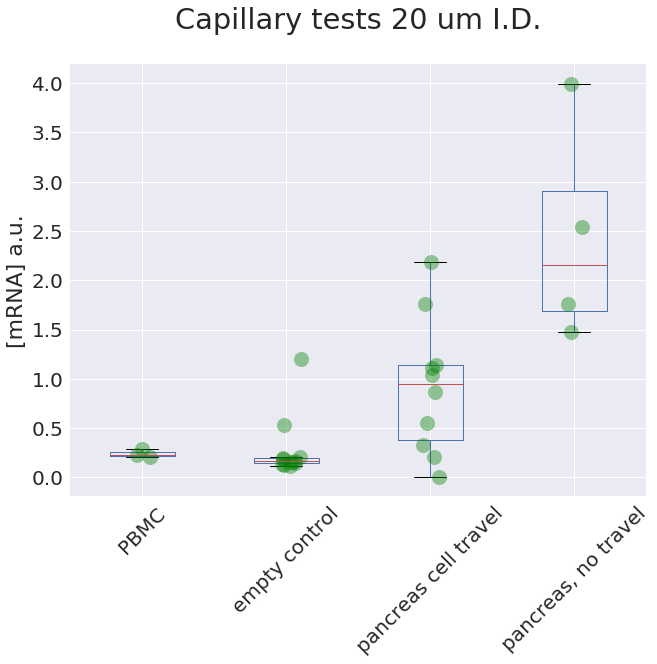

In [92]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
gs = gridspec.GridSpec(1, 1)
ax1 = f.add_subplot(gs[0,0])
captest1[~captest1['Well_number'].str.contains('H2')].boxplot('CONCENTRATION',by='Collection',ax=ax1)
plt.xticks(rotation=45)
k=1
for i in ['PBMC', 'empty control', 'pancreas cell travel','pancreas, no travel']:
    y = realdata[realdata['Collection']==i]['CONCENTRATION']
    x = np.random.normal(k, 0.04, size=len(y))
    k+=1
    plt.plot(x, y, 'g.',markersize=30, alpha=0.4)
    
plt.suptitle('Capillary tests 20 um I.D.')
plt.xlabel('');plt.ylabel('[mRNA] a.u.')
plt.title('')
plt.gcf().subplots_adjust(bottom=0.3)#,top=0.95,right=0.96)
#gs.update(hspace=.0,wspace=0.02)
plt.show()

f.savefig('CapTests/Captest_PBMC_Pancreas_20umID_box.png')

In [60]:
captest1[~captest1['Well_number'].str.contains('H2')]['Collection'].unique()

array(['PBMC', 'empty control', 'pancreas, no travel',
       'pancreas cell travel'], dtype=object)

In [71]:
realdata['Collection'].unique()

array(['PBMC', 'empty control', 'pancreas, no travel',
       'pancreas cell travel'], dtype=object)

In [36]:
captest1[~captest1['Well_number'].str.contains('H2')]

,Well_number,Cell_number,Collection,comments,verdict,CONCENTRATION,DATE,day_number
0,A1,1,PBMC,"cell in buffer only, no sds",NaN,0.2887,21-01-18,Day 1
1,B1,2,PBMC,"2 cells went in intact, with SDS",NaN,0.2059,21-01-18,NaN
2,C1,3,empty control,NaN,NaN,0.1603,21-01-18,NaN
3,D1,4,PBMC,lysed in front of cap,NaN,0.2310,21-01-18,NaN
4,E1,5,empty control,SDS,NaN,0.1663,21-01-18,NaN
5,A2,6,"pancreas, no travel",NaN,CELL,3.9896,25-01-18,Day 2?
6,B2,7,"pancreas, no travel",NaN,CELL,1.7582,25-01-18,NaN
7,C2,8,empty control,NaN,DEGRADED SOMETHING,0.5362,25-01-18,NaN
8,D2,9,"pancreas, no travel",change pippette,CELL,2.5437,25-01-18,NaN
9,E2,10,"pancreas, no travel",NaN,CELL,1.4771,25-01-18,NaN
